# Введение. Нейронные сети

В машинном обучении особое место занимают нейронные сети. Как можно догадаться из названия, нейронная сеть была создана на основе нейронов в мозгу человека.

Нейронные сети хорошо себя зарекомендовали в анализе изображений, так называемое компьютерное зрение. Они хороши в:
* Классификации - отделении среди всех картинок заранее распределенных групп, например, деление на кошек и собак.
* Предсказание — возможность предсказывать следующий шаг. Например, рост или падение акций, основываясь на ситуации на фондовом рынке.
* Распознавание — самым простым примером является распознавание вашего лица камерой телефона.

Нейронные сети имеют свои плюсы:
1. Устойчивость к шумам входных данных
2. Адаптация к изменениям при обучении
3. Быстродействие

Однако нейронные сети редко дают точные ответы и являются лишь дополнением к решениям человека. Например, в медицине нейронные сети используются для анализа медицинских изображений, однако чаще всего не дают точного диагноза, а всего лишь предсказывают вероятность того или иного заболевания.

## Строение нейронной сети

Нейрон похож на функцию: он принимает на вход несколько значений и возвращает одно. Важно помнить, что нейроны оперируют числами в диапазоне [0,1] или [-1,1], а числа, выходящие за этот диапозон, необходимо нормализовать.


Ниже представлена схема работы искуссвенного нейрона.

У нейрона есть $n$ входов $x_i$, у каждого из которого есть вес $w_i$, на который умножается сигнал, проходящий по связи. После этого взвешенные сигналы $x_i*w_i$ направляются в сумматор, который аггрегирует все сигналы во взвешенную сумму. Эту сумму также называют net. Таким образом, $
net=\sum\limits_{i=1}^n w_i*x_i$.

Далее к полученной сумме применяют функцию активации, которая преобразует взвешенную сумму в какое-то число, которое и будет являться выходом нейрона. Функция активации обозначается ϕ(net). Таким образом, выходов искусственного нейрона является ϕ(net).

In [1]:
from IPython.display import Image 
from IPython.core.display import HTML 
Image(url= "http://neerc.ifmo.ru/wiki/images/a/a5/Искусственный_нейрон_схема.png", width=500)

Если вы объедините эти нейроны, то получите прямо распространяющуюся нейронную сеть — процесс идёт от ввода к выводу, через нейроны, соединённые связями с значениями весов (синапсами). От веса зависит степень важности признака $x_i$, которая меняется в процессе обучения. Во время инициализации нейронной сети, веса расставляются в случайном порядке. 

Для обучения сети в прямо распространяющейся нейронной сети вы проходите все нейроны до выходного слоя, а затем сеть подстраивает веса $w_i$ с помощью метода обратного распространения ошибки.

В нейронной сети есть два обязательных слоя: входной и выходной, а слои посередине называются скрытыми.

Количество нейронов в выходном слое зависит от задачи. Например, в случае классификации количество выходных нейронов равно тому количеству классов, на которые делится выборка изображений.

In [2]:
Image(url= "https://cdn.tproger.ru/wp-content/uploads/2016/08/15GSpUs2hWFx4Lq2_KCyulg.png", width=400)

## Функции активации

Поговорим о функциях активации. По сути, это всего лишь некоторая функция, которая применяется к после сумматора, для получения нужного ответа. Их много, например, Линейная, Сигмоид (Логистическая),Гиперболический тангенс. В данной лабораторной мы применим две функции, ReLU(Rectified linear unit) и Softmax, однако подробно рассматривать их не будем.

В случае ReLU $f(x) = max(0,x)$. Пользуясь определением, становится понятно, что ReLu возвращает значение х, если х положительно, и 0 в противном случае.

Функция Softmax применяется в машинном обучении для задач классификации, когда количество возможных классов больше двух, и обычно на выходном слое. Сумма всех выходных сигналов при этом равна 1 (то есть каждое значение это вероятность принадлежности данного изображения к классу).



## Валидационная выборка

Отметим еще один важный момент. В прошлых лабораторных мы делили наш датсет на обучающую и тестовую выборку. Однако сегодя мы рассмотрим еще одну выборку, на которую можно делить датасет. Это так называемая валидационная выборка (validation или иногда development set).

Тогда датасет делится на:
* Обучающую выборку, на которой запускается алгоритм обучения;
* Валидационную, которая используется для настройки параметров, выбора признаков и принятия других решений относительно алгоритма обучения, иногда такую выборку называют удерживаемой для перёкрестной проверки (hold-out cross validation set);
* Тестовую, на которой оценивают качество работы алгоритма, но на её основе не принимают никаких решений о том, какой алгоритм обучения или параметры использовать.

#Основные шаги по выполнению лабораторной работы

##1. Импортируем необходимые библиотеки

В данной лабораторной работе мы будем использовать библиотеку Tensorflow. TensorFlow — открытая программная библиотека для машинного обучения, разработанная компанией Google для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, достигая качества человеческого восприятия.

Для работы с сетями глубокого обучения мы будем использовать нейросетевую библиотеку Keras, являющуюся надстройкой над Tensorflow.

В Keras уже есть встроенные датасеты, например, fashion_mnist и мы воспользуемся им для построения нейронной сети. Также нам понабится уже знакомая библиотека numpy и matplotlib для отрисовки графиков.



In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

##2. Подготовка данных

Мы будем работать с датасетом fashion_mnist, представляющим собой набор картинок одежды, обуви или сумок.

Разделим датасет на обучающую и тестовую выборки.

In [4]:
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


И создадим список с названиями классов:

In [0]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Так как мы работаем с изображениями, а не с числами, следует понять, как они представлены в компьютере. Наши изображения на самом деле являются набором точек разного цвета. Более научно - двумерными массивами, содрежащими числа, которые харктеризуют интенсивность пикселя для черно-белого изображения. В таком случае значение 0 будет значить черный пиксель, а 255 белый. Позже мы нормализуем эти значения, чтобы они были от нуля до единицы.

Посмотрим картинки из нашего набора данных:

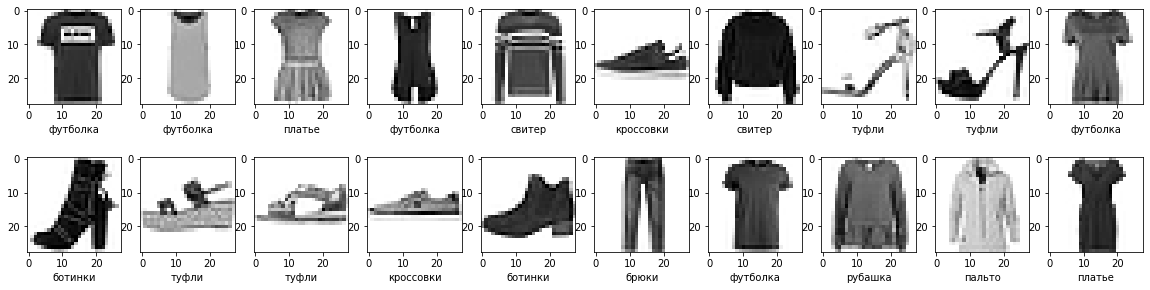

In [6]:
plt.figure(figsize=(20,5))
for i in range(1,21):
    plt.subplot(2,10,i)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

Нейронная сеть принимает на вход плоский вектор, а не двумерные изображения, которые имеются в fashion_mnist. Так что мы преобразуем размерность наших данных:


In [0]:
X_train = X_train.reshape(60000, 784) # 60000 изображений по 784 пикселя в каждом
X_test = X_test.reshape(10000, 784)

Дальше мы нормализуем данные. Нормализация данных необходима, чтобы в своих результатах не зависить от величин переменных, а только от их соотношения. Здесь мы используем деление на 255 для приведения значения пикселей в диапозон от 0 до 1.

In [0]:
X_train = X_train / 255 
X_test = X_test / 255 

Входные данные мы подготовили, теперь давайте поговорим о выходных. Наша задача, чтобы при подачи картинки в нейронную сеть, она смогла сказать нам, является ли эта вещь футболкой, обувью, сумкой и т.д. Предсказания нашей нейронной сети записаны с помощью списка из 10 классов, где все значения равны 0, кроме предсказанного класса, равного 1. Это называется подход one hot encoding.

То есть если картинка была определена как футболка (1 в списке classes), то программа выдаст [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]. 

А если как рубашка (7 в списке classes), то [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].

С помощью следующего кода мы превратим наш y_train и y_test в такие же массивы, понятные нейронной сети. И сравним y_train до и после.


In [9]:
y_train[0]

9

In [0]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

##3. Создание нейронной сети

При создании нейронной сети мы будем использовать модель Sequental из библиотеки Keras, в которой все слои сети идут последовательно друг за другом.

Объявим модель:

In [0]:
model = Sequential()

И создадим два полносвязных слоя: входной и выходной.

Входным слоем является тот, который принимает наши данные. Зададим здесь количество нейронов (800), количество пикселей (784 или для сети 784 входа в каждый нейрон) и активационную функцию (ReLU).

На выходном слое мы укажем количество классов, которые получатся при предсказании (10) и и активационную функцию (Softmax).

In [13]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Далее мы скомпилируем нашу модель и посмотрим на ее описание.

Здесь мы используем функцию ошибки категориальная перекрестная энтропия (вместо метода наименьших квадратов),  стохастический градиентный спуск (SGD) в качестве оптимизатора и точность в метрике.

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


##4. Обучение нейронной сети

Теперь обучим сети с помощью метода fit. Здесь же мы задаем некоторые параметры при обучении:

* batch_size - размер мини-выборки для стохастического градиентного спуска. Мы берем batch_size изображений, прогоняем через сеть, меняем веса и повторяем процедуру.
* epochs - количество эпох, то есть сколько раз мы будем обучаться на полном наборе данных
* validation_split - деление нашей обучающей выборки на обучающую и валидационную
* verbose - отвечает за подробность изображения отчета при обучении (0, 1 или 2)

В выводе обучения мы можем увидеть информацию по каждой эпохе: количество использованных изображений, время выполнения, функция ошибки и точность (доля правильных ответов), а также последние два параметра для валидационной выборки.

In [15]:
model.fit(X_train, y_train, batch_size=200, epochs=100, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 39us/sample - loss: 1.2045 - acc: 0.6520 - val_loss: 0.8457 - val_acc: 0.7358
Epoch 2/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.7712 - acc: 0.7577 - val_loss: 0.7014 - val_acc: 0.7760
Epoch 3/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.6713 - acc: 0.7896 - val_loss: 0.6349 - val_acc: 0.7943
Epoch 4/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.6171 - acc: 0.8047 - val_loss: 0.5935 - val_acc: 0.8084
Epoch 5/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.5814 - acc: 0.8143 - val_loss: 0.5665 - val_acc: 0.8148
Epoch 6/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.5561 - acc: 0.8206 - val_loss: 0.5493 - val_acc: 0.8177
Epoch 7/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.5368 - acc: 0.8254 - val_l

Обученную сеть так же можно сохранить для дальнейшего использоавния, чтобы не тратить постоянно время на обучение:

In [0]:
model.save('fashion_mnist_dense.h5')

Тогда загрузить ее можно таким образом:

In [17]:
from tensorflow.keras.models import load_model
new_model = load_model('fashion_mnist_dense.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


##5. Оценка качества обучения

Для начала посмотрим на значения val_acc  в выводе выше. Можно заметить, что в начале обучения точность растет, но к концу начинает то подниматься, то опускаться (97-100 эпохи).  Это один из явных признаков переобучения.
Еще если val_loss ошибка увеличивается, а loss уменьшается, это также говорит о переобучении.

Также давайте используем наш тестовый датасет для предсказания и выведем точность (здесь выводится самый простой вариант определения точности, однако не самый лучший):

In [18]:
scores = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.3764 - acc: 0.8665


In [19]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.65


Вы можете загружать собственные картинки в нейронную сеть, но посмотрим для примера распознавание одной картинки из тестового датасета (например 354ой):

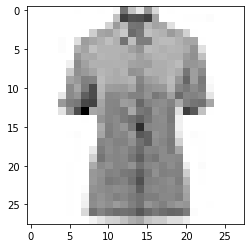

In [20]:
plt.imshow(X_test[354].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Предскажем класс изображения, передав в predict 354ую картинку из тестового набора X, с преобразованной размерностью (np.expand_dims)

In [0]:
prediction = model.predict(np.expand_dims(X_test[354], axis=0))

In [22]:
prediction

array([[1.9403465e-01, 6.3116377e-04, 1.9796191e-02, 1.9859153e-01,
        5.0462559e-02, 4.4439264e-07, 5.2992070e-01, 5.0879580e-06,
        6.5569216e-03, 6.7549962e-07]], dtype=float32)

Выведем предсказанный класс и реальный класс:

In [23]:
prediction = np.argmax(prediction[0])
print("Это изображение предсказано как", prediction, "класс, то есть это", classes[prediction])


Это изображение предсказано как 6 класс, то есть это рубашка


In [24]:
label = np.argmax(y_test[354])
print("Это изображение является", label, "классом, то есть это",  classes[label])

Это изображение является 6 классом, то есть это рубашка


##6. Увеличение качества обучения

Для увеличения точности работы нейронной сети можно изменять ее параметры.
Основыными параметрами для изменения являются:
1. Количество эпох обучения.
2. Размер мини-выборки.
3. Количество нейронов входного слоя.
4. Наличие скрытых слоев.

### Количество эпох обучения и размер мини выборки

Данные параметры задаются при обучении модели.


In [25]:
history = model.fit(X_train, y_train, 
                    batch_size=200,        # Размер мини-выборки
                    epochs=100,            # Количество эпох
                    validation_split=0.2, 
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.3160 - acc: 0.8911 - val_loss: 0.3541 - val_acc: 0.8741
Epoch 2/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3157 - acc: 0.8915 - val_loss: 0.3550 - val_acc: 0.8747
Epoch 3/100
48000/48000 [==============================] - 1s 24us/sample - loss: 0.3145 - acc: 0.8922 - val_loss: 0.3547 - val_acc: 0.8767
Epoch 4/100
48000/48000 [==============================] - 1s 24us/sample - loss: 0.3139 - acc: 0.8918 - val_loss: 0.3543 - val_acc: 0.8767
Epoch 5/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3129 - acc: 0.8920 - val_loss: 0.3516 - val_acc: 0.8762
Epoch 6/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3121 - acc: 0.8924 - val_loss: 0.3534 - val_acc: 0.8758
Epoch 7/100
48000/48000 [==============================] - 1s 25us/sample - loss: 0.3117 - acc: 0.8925 - val_l

### Количество нейронов входного слоя

Количество нейронов задается при создании входного слоя. Здесь оно 200.

In [0]:
model.add(Dense(200, input_dim=784, activation="relu"))

### Наличие скрытых слоев

Скрытыми слоями называются слои, находящиеся между входным и выходным. Они добавляются в последовательную модель, как и входной и выходной слой.

In [0]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(600, activation="relu"))  # Новый скрытый слой
model.add(Dense(10, activation="softmax"))

#Задание

Возьмите созданную нейронную сеть, датасет fashion-mnist и попытайтесь улучшить точность обучения. Варианты для улучшения:
1. Используйте разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
4. Используйте разное количество эпох: 10, 15, 20, 25, 30.
5. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.

Опишите влияние (или его отсутствие) на точность работы вашей нейронной сети измененяемых параметров.

Сохраните два варианта сети, при котором точность нейронной сети минимальна и максимальна, выведите точность и сделайте вывод о переобучении. Необходимо менять не менее трех параметров (то есть использовать не менее трех вариантов из списка выше). 


In [28]:
model1 = Sequential()

model1.add(Dense(1200, input_dim=784, activation="relu"))
model1.add(Dense(10, activation="softmax"))

model1.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model1.summary()

model1.fit(X_train, y_train, batch_size=500, epochs=10, validation_split=0.2, verbose=1)

model1.save('fashion_mnist_dense_1.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1200)              942000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                12010     
Total params: 954,010
Trainable params: 954,010
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 18us/sample - loss: 1.5190 - acc: 0.5903 - val_loss: 1.1063 - val_acc: 0.7003
Epoch 2/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.9866 - acc: 0.7191 - val_loss: 0.8789 - val_acc: 0.7433
Epoch 3/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.8371 - acc: 0.7514 - val_loss: 0.7810 - val_acc: 0.7624
Epoch 4/10
48000/48000 [===================

In [29]:
scores_1 = model1.evaluate(X_test, y_test, verbose=1)

print("Доля верных ответов на тестовых данных, в процентах:", round(scores_1[1] * 100, 4))

10000/10000 [==============================] - 1s 82us/sample - loss: 0.6068 - acc: 0.7986
Доля верных ответов на тестовых данных, в процентах: 79.86


In [30]:
model2 = Sequential()

model2.add(Dense(400, input_dim=784, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model2.summary()

model2.fit(X_train, y_train, batch_size=500, epochs=10, validation_split=0.2, verbose=1)

model2.save('fashion_mnist_dense_2.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 15us/sample - loss: 1.5760 - acc: 0.5503 - val_loss: 1.1728 - val_acc: 0.6779
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 1.0382 - acc: 0.6944 - val_loss: 0.9216 - val_acc: 0.7217
Epoch 3/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.8737 - acc: 0.7352 - val_loss: 0.8137 - val_acc: 0.7492
Epoch 4/10
48000/48000 [===================

In [31]:
scores_2 = model2.evaluate(X_test, y_test, verbose=1)

print("Доля верных ответов на тестовых данных, в процентах:", round(scores_2[1] * 100, 4))

10000/10000 [==============================] - 1s 72us/sample - loss: 0.6214 - acc: 0.7953
Доля верных ответов на тестовых данных, в процентах: 79.53


In [32]:
model3 = Sequential()

model3.add(Dense(600, input_dim=784, activation="relu"))
model3.add(Dense(10, activation="softmax"))

model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model3.summary()

model3.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.2, verbose=1)

model3.save('fashion_mnist_dense_3.h5')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                6010      
Total params: 477,010
Trainable params: 477,010
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 45us/sample - loss: 1.0213 - acc: 0.6905 - val_loss: 0.7105 - val_acc: 0.7761
Epoch 2/20
48000/48000 [==============================] - 2s 43us/sample - loss: 0.6509 - acc: 0.7916 - val_loss: 0.6003 - val_acc: 0.8048
Epoch 3/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.5750 - acc: 0.8139 - val_loss: 0.5487 - val_acc: 0.8189
Epoch 4/20
48000/48000 [===================

In [33]:
scores_3 = model3.evaluate(X_test, y_test, verbose=1)

print("Доля верных ответов на тестовых данных, в процентах:", round(scores_3[1] * 100, 4))

10000/10000 [==============================] - 1s 75us/sample - loss: 0.4320 - acc: 0.8498
Доля верных ответов на тестовых данных, в процентах: 84.98


In [34]:
model4 = Sequential()

model4.add(Dense(800, input_dim=784, activation="relu"))
model4.add(Dense(400, activation="relu"))
model4.add(Dense(10, activation="softmax"))

model4.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model4.summary()

model4.fit(X_train, y_train, batch_size=50, epochs=25, validation_split=0.2, verbose=1)

model4.save('fashion_mnist_dense_4.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 4s 91us/sample - loss: 0.7986 - acc: 0.7528 - val_loss: 0.5530 - val_acc: 0.8166
Epoch 2/25
48000/48000 [==============================] - 4s 87us/sample - loss: 0.5198 - acc: 0.8245 - val_loss: 0.4867 - val_acc: 0.8309
Epoch 3/25
48000/48000 [==========================

In [35]:
scores_4 = model4.evaluate(X_test, y_test, verbose=1)

print("Доля верных ответов на тестовых данных, в процентах:", round(scores_4[1] * 100, 4))

10000/10000 [==============================] - 1s 83us/sample - loss: 0.3611 - acc: 0.8703
Доля верных ответов на тестовых данных, в процентах: 87.03


In [36]:
model5 = Sequential()

model5.add(Dense(800, input_dim=784, activation="relu"))
model5.add(Dense(400, activation="relu"))
model5.add(Dense(200, activation="relu"))
model5.add(Dense(10, activation="softmax"))

model5.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model5.summary()

model5.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.2, verbose=1)

model5.save('fashion_mnist_dense_5.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_16 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2010      
Total params: 1,030,610
Trainable params: 1,030,610
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 22s 451us/sample - loss: 0.5696 - acc: 0.8035 - val_loss: 0.4181 - val_acc: 0.8501
Epoch 2/30
48000/48000 [===========================

In [37]:
scores_5 = model5.evaluate(X_test, y_test, verbose=1)

print("Доля верных ответов на тестовых данных, в процентах:", round(scores_5[1] * 100, 4))

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3860 - acc: 0.8868
Доля верных ответов на тестовых данных, в процентах: 88.68


In [38]:
model6 = Sequential()

model6.add(Dense(1200, input_dim=784, activation="relu"))
model6.add(Dense(800, activation="relu"))
model6.add(Dense(600, activation="relu"))
model6.add(Dense(400, activation="relu"))
model6.add(Dense(300, activation="relu"))
model6.add(Dense(200, activation="relu"))
model6.add(Dense(10, activation="softmax"))

model6.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model6.summary()

model6.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.2, verbose=1)

model6.save('fashion_mnist_dense_6.h5')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1200)              942000    
_________________________________________________________________
dense_20 (Dense)             (None, 800)               960800    
_________________________________________________________________
dense_21 (Dense)             (None, 600)               480600    
_________________________________________________________________
dense_22 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_23 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_24 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

In [39]:
scores_6 = model6.evaluate(X_test, y_test, verbose=1)

print("Доля верных ответов на тестовых данных, в процентах:", round(scores_6[1] * 100, 4))

10000/10000 [==============================] - 1s 106us/sample - loss: 0.4056 - acc: 0.8935
Доля верных ответов на тестовых данных, в процентах: 89.35
